In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


(np.float64(-0.5), np.float64(554.5), np.float64(540.5), np.float64(-0.5))

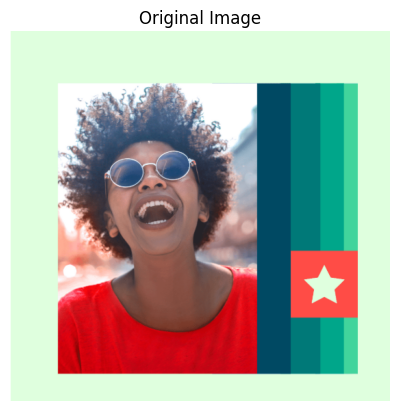

In [13]:
# Load image (BGR format)
img = cv2.imread('image Alpha.jpg')

# Convert BGR to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')


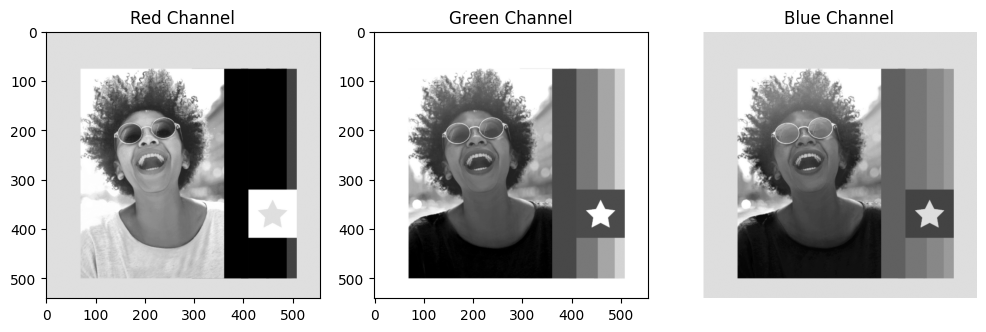

In [14]:
R, G, B = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(R, cmap='gray')
plt.title("Red Channel")

plt.subplot(1,3,2)
plt.imshow(G, cmap='gray')
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(B, cmap='gray')
plt.title("Blue Channel")
plt.axis('off')
plt.show()


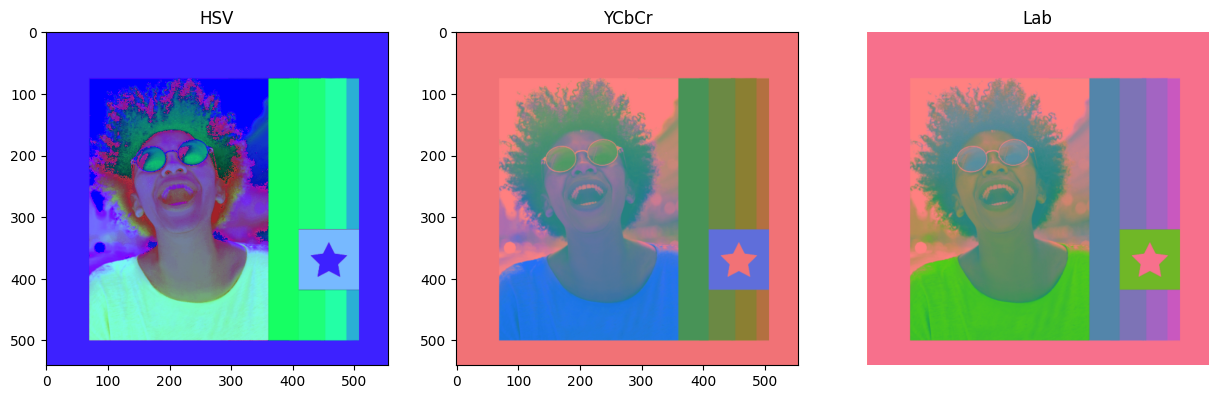

In [15]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
ycbcr = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(hsv)
plt.title("HSV")

plt.subplot(1,3,2)
plt.imshow(ycbcr)
plt.title("YCbCr")

plt.subplot(1,3,3)
plt.imshow(lab)
plt.title("Lab")
plt.axis('off')
plt.show()


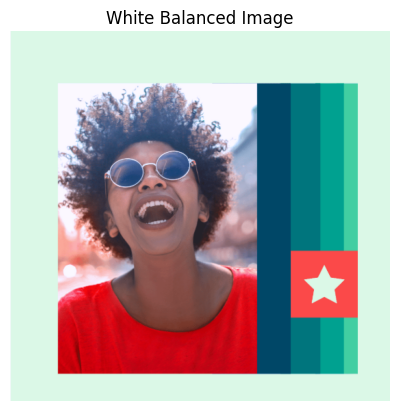

In [16]:
def white_balance(img):
    result = img.copy().astype(np.float32)
    avgB, avgG, avgR = np.mean(result[:,:,0]), np.mean(result[:,:,1]), np.mean(result[:,:,2])
    avgGray = (avgB + avgG + avgR) / 3

    result[:,:,0] *= avgGray / avgB
    result[:,:,1] *= avgGray / avgG
    result[:,:,2] *= avgGray / avgR

    return np.clip(result, 0, 255).astype(np.uint8)

wb_img = white_balance(img_rgb)

plt.imshow(wb_img)
plt.title("White Balanced Image")
plt.axis('off')
plt.show()


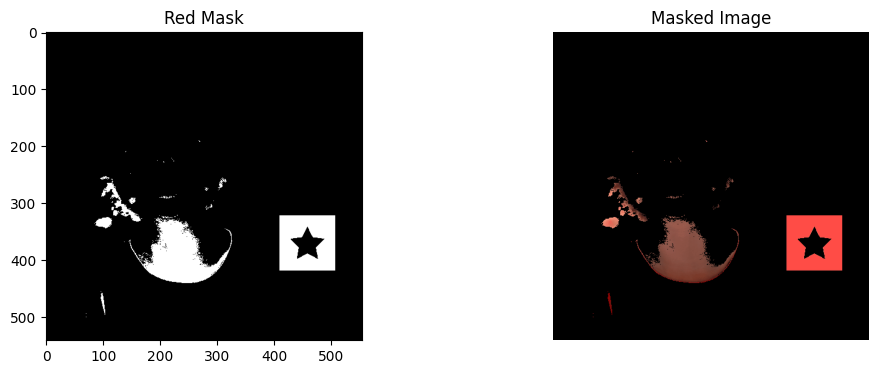

In [17]:
hsv_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

lower_red = np.array([0, 120, 70])
upper_red = np.array([10, 255, 255])

mask = cv2.inRange(hsv_img, lower_red, upper_red)
result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(mask, cmap='gray')
plt.title("Red Mask")

plt.subplot(1,2,2)
plt.imshow(result)
plt.title("Masked Image")
plt.axis('off')
plt.show()


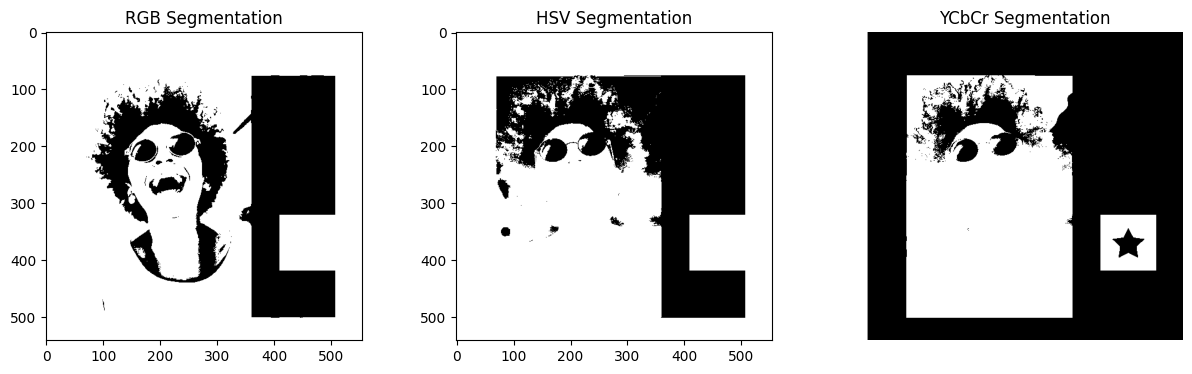

In [18]:
# Thresholding in different color spaces

# RGB
_, rgb_seg = cv2.threshold(R, 120, 255, cv2.THRESH_BINARY)

# HSV (Hue channel)
_, hsv_seg = cv2.threshold(hsv[:,:,0], 50, 255, cv2.THRESH_BINARY)

# YCbCr (Cb channel)
_, ycbcr_seg = cv2.threshold(ycbcr[:,:,2], 120, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.imshow(rgb_seg, cmap='gray')
plt.title("RGB Segmentation")

plt.subplot(1,3,2)
plt.imshow(hsv_seg, cmap='gray')
plt.title("HSV Segmentation")

plt.subplot(1,3,3)
plt.imshow(ycbcr_seg, cmap='gray')
plt.title("YCbCr Segmentation")
plt.axis('off')
plt.show()
